In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#đọc dữ liệu với dataset đã cho
# Đọc dữ liệu từ file CSV
df = pd.read_csv('quangcao.csv',index_col=0)


In [3]:

# Kiểm tra dữ liệu
print(df.head())
df.tail()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# kiểm tra tổng quát datafame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
# thống kê mô tả cho các cột
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


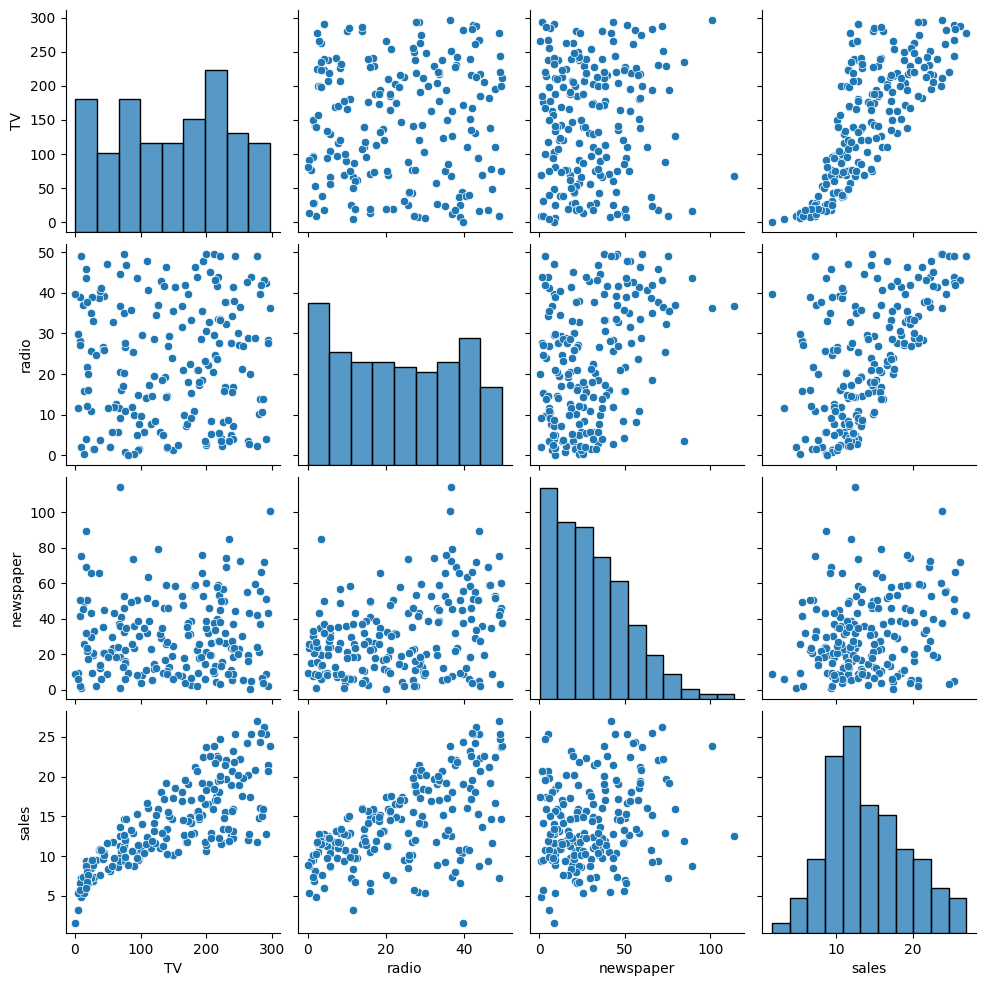

In [6]:
#Trực quan hóa dữ liệu 
# Trực quan hóa mối quan hệ giữa các biến
sns.pairplot(df)
plt.show()



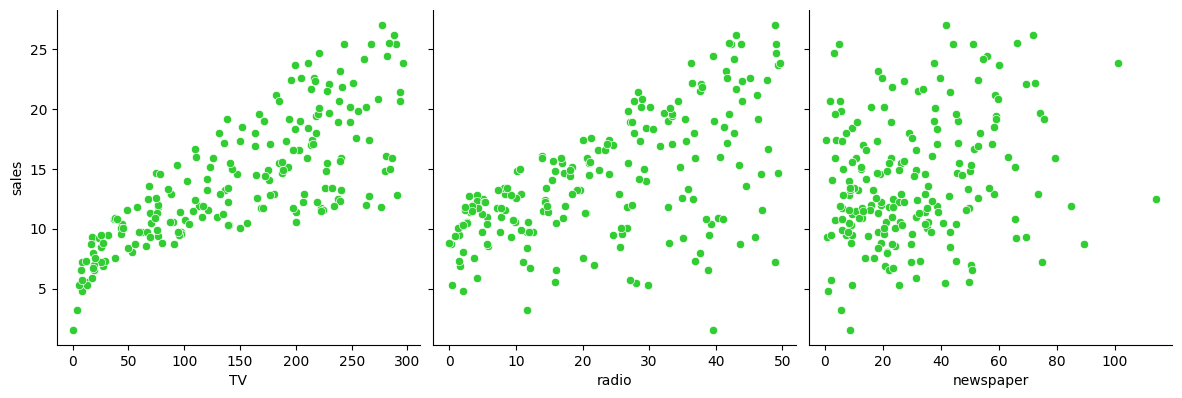

In [7]:

color_list = ['#FF6347', '#4682B4', '#32CD32']
#  trực quan hóa mối quan hệ giữa các biến
sns.pairplot(df, 
             x_vars=['TV', 'radio', 'newspaper'], 
             y_vars='sales', 
             height=4, 
             aspect=1, 
             kind='scatter', 
             plot_kws={'color': color_list[2]})
plt.show() 

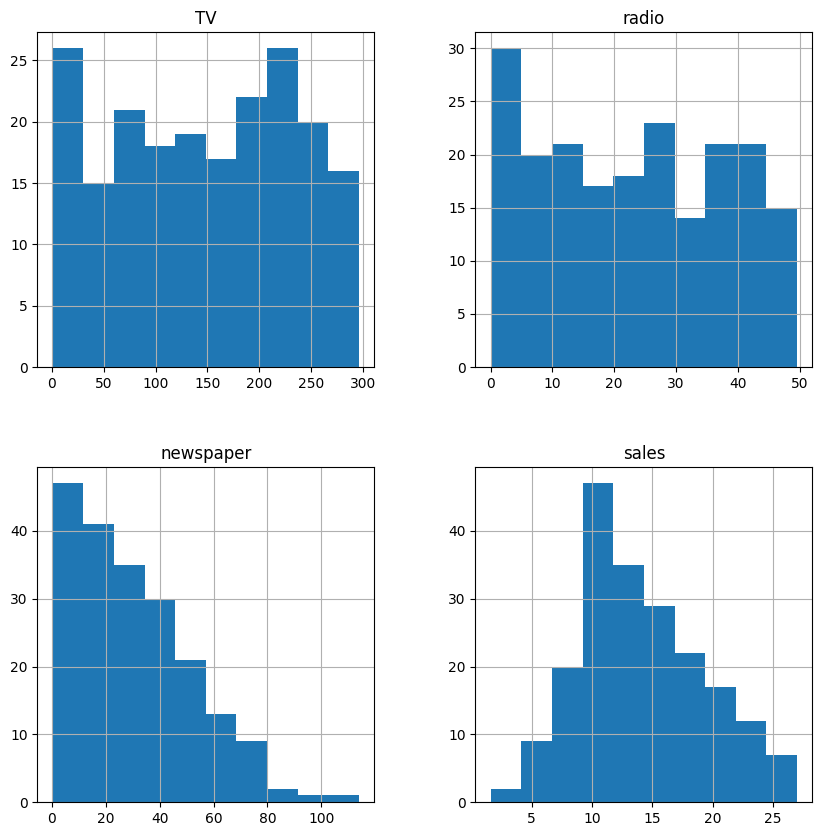

In [8]:
# biểu đồ histogram
df.hist( bins = 10, figsize = (10,10))
plt.show()

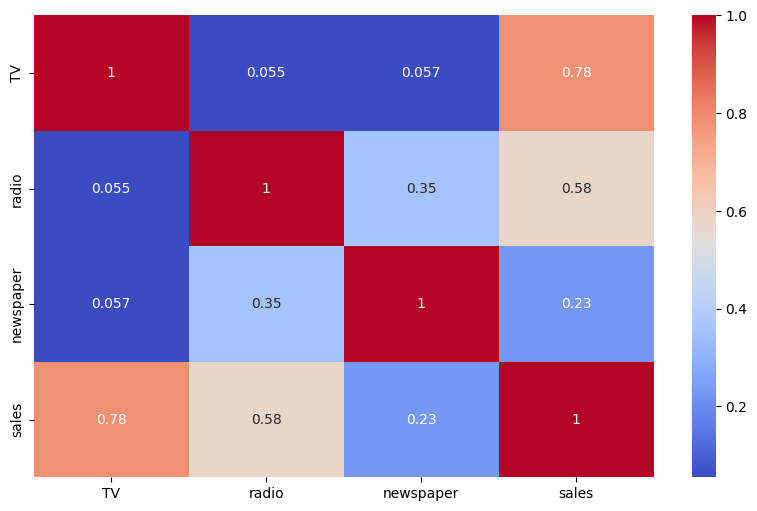

In [9]:

# Biểu đồ tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:

# Xác định biến đầu vào và biến đầu ra
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.head(10)

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
116    12.6
70     22.3
171     8.4
175    11.5
46     14.9
Name: sales, dtype: float64

In [11]:
color_list = sns.color_palette("muted", n_colors=4) 

In [12]:
# Xây dựng mô hình hồi quy tuyến tính
# Tạo mô hình hồi quy tuyến tính
lr_model = LinearRegression()

# Huấn luyện mô hình
lr_model.fit(X_train, y_train)

# Dự đoán
y_pred_lr = lr_model.predict(X_test)




In [13]:
# Lấy các trọng số (coefficients) và hệ số bù (intercept)
weights = lr_model.coef_
bias = lr_model.intercept_

print("Trọng số (weights):", weights)
print("Hệ số bù (bias):", bias)

Trọng số (weights): [0.04472952 0.18919505 0.00276111]
Hệ số bù (bias): 2.9790673381226256


In [14]:
# Đánh giá mô hình
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Hồi quy tuyến tính - MSE:", mse_lr)
print("Hồi quy tuyến tính - R2:", r2_lr)


Hồi quy tuyến tính - MSE: 3.174097353976104
Hồi quy tuyến tính - R2: 0.899438024100912


In [15]:
# Hồi quy OLS với statsmodels
import statsmodels.api as sm
X2 = sm.add_constant(X) 
est = sm.OLS(y, X2)  
est2 = est.fit() 
print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        09:42:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

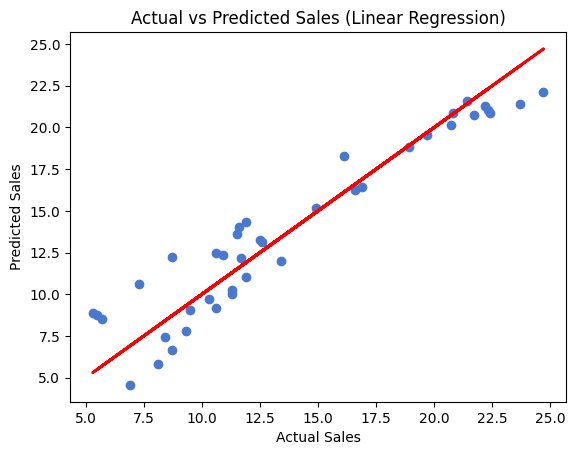

In [16]:
# Trực quan hóa kết quả hồi quy tuyến tính
plt.scatter(y_test, y_pred_lr, color=color_list[0])
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

In [17]:
# Xây dựng mô hình KNN
# Tạo mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)

# Dự đoán
y_pred_knn = knn_model.predict(X_test)

# Đánh giá mô hình
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN - MSE:", mse_knn)
print("KNN - R2:", r2_knn)

KNN - MSE: 2.8211400000000006
KNN - R2: 0.9106204438460053


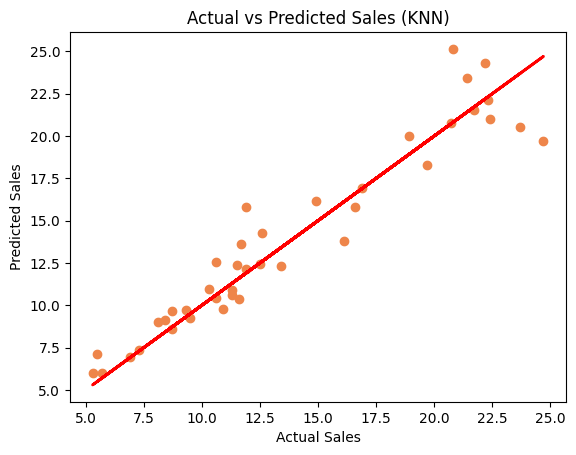

In [18]:
# Trực quan hóa kết quả KNN
plt.scatter(y_test, y_pred_knn, color=color_list[1])
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (KNN)')
plt.show()

In [19]:
from sklearn.svm import SVR
# Xây dựng mô hình SVR
# Tạo mô hình SVR
svr_model = SVR(kernel='linear')

# Huấn luyện mô hình
svr_model.fit(X_train, y_train)

# Dự đoán
y_pred_svr = svr_model.predict(X_test)

# Đánh giá mô hình
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR - MSE:", mse_svr)
print("SVR - R2:", r2_svr)

SVR - MSE: 3.603419765315391
SVR - R2: 0.8858362012305588


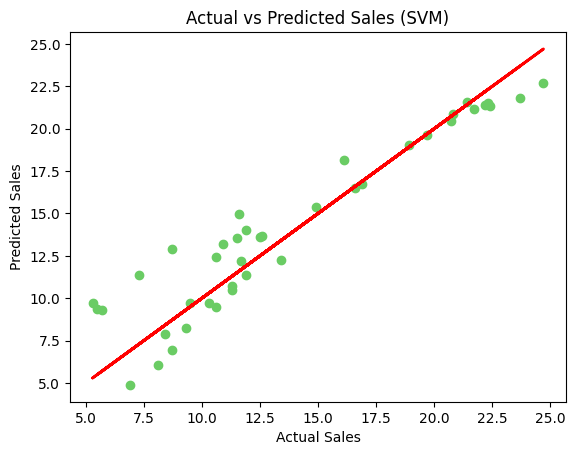

In [20]:
# Trực quan hóa kết quả SVM
plt.scatter(y_test, y_pred_svr, color=color_list[2])
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (SVM)')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - MSE:", mse_rf)
print("Random Forest - R2:", r2_rf)

Random Forest - MSE: 0.5907322499999988
Random Forest - R2: 0.9812843792541843


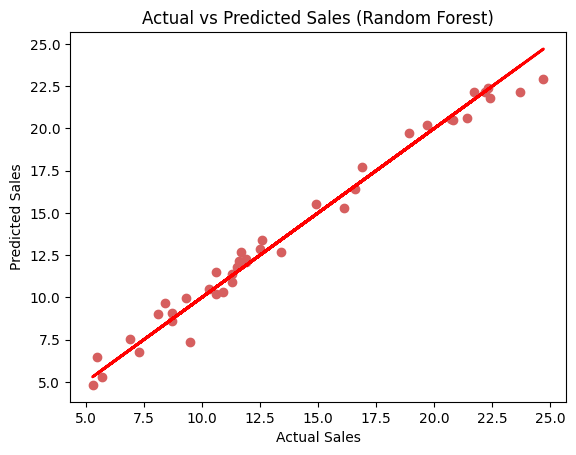

In [22]:
# Trực quan hóa kết quả Random Forest
plt.scatter(y_test, y_pred_rf, color=color_list[3])
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()

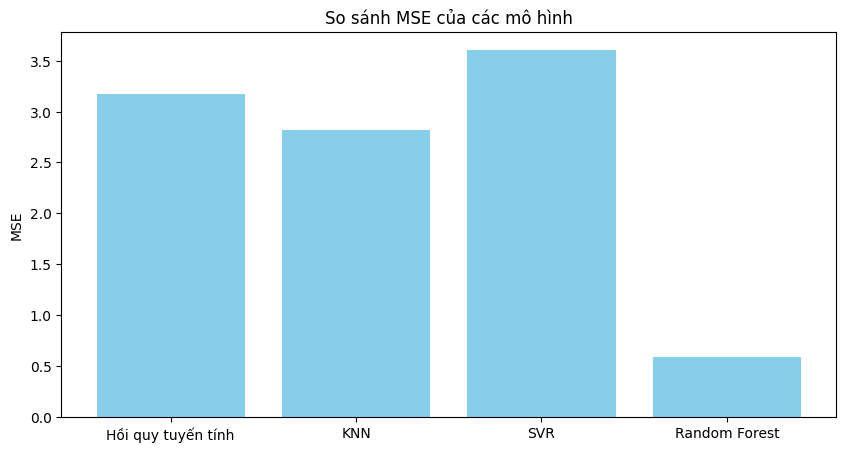

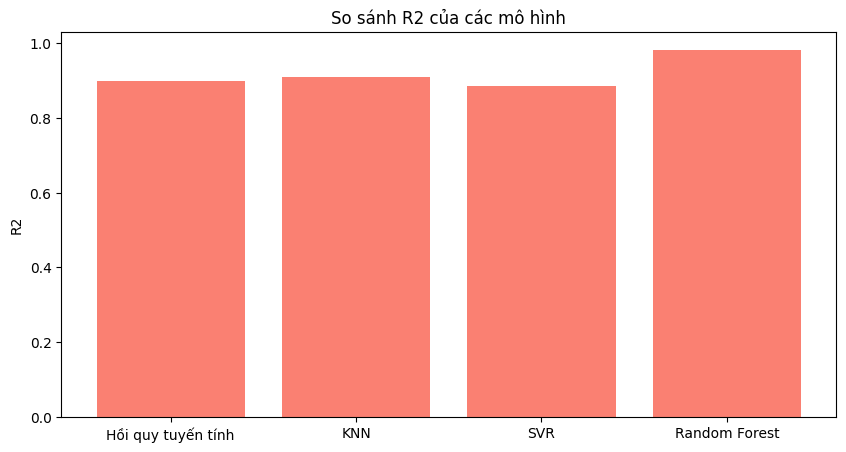

In [23]:
# So sánh hiệu suất các mô hình
models = ['Hồi quy tuyến tính', 'KNN', 'SVR', 'Random Forest']
mse_values = [mse_lr, mse_knn, mse_svr, mse_rf]
r2_values = [r2_lr, r2_knn, r2_svr, r2_rf]

# Vẽ biểu đồ so sánh MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='skyblue')
plt.title('So sánh MSE của các mô hình')
plt.ylabel('MSE')
plt.show()

# Vẽ biểu đồ so sánh R2
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='salmon')
plt.title('So sánh R2 của các mô hình')
plt.ylabel('R2')
plt.show()

In [24]:
import joblib

# Lưu trữ các mô hình vào các file khác nhau
joblib.dump(lr_model, 'linear_regression_model.pkl') 
joblib.dump(knn_model, 'knn_model.pkl')               
joblib.dump(svr_model, 'svr_model.pkl')               
joblib.dump(rf_model, 'random_forest_model.pkl')     


['random_forest_model.pkl']